# Assignment 2 Rough Work

In [161]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from mpctools.extensions.mplext import plot_matrix
from mpctools.extensions.skext import multi_way_split
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import confusion_matrix, log_loss, adjusted_mutual_info_score
from pandas.api.types import CategoricalDtype
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

## 1. Exploratory Analysis

In [2]:
# create data frames
data_path = os.path.join(os.getcwd(), 'Data', 'PartA', '20ng_train.csv')
trn_newsgroup = pd.read_csv(data_path, delimiter=',', compression='bz2')
data_path2 = os.path.join(os.getcwd(), 'Data', 'PartA', '20ng_test.csv')
tst_newsgroup = pd.read_csv(data_path2, delimiter=',', compression='bz2')
data_path3 = os.path.join(os.getcwd(), 'Data', 'PartA', '20ng_labels.csv')
lbl_newsgroup = pd.read_csv(data_path3, delimiter=',', compression='bz2')
lbl_newsgroup.head(10)

,0
0,comp.sys.ibm.pc.hardware
1,comp.sys.mac.hardware
2,rec.autos
3,rec.motorcycles
4,sci.crypt
5,sci.electronics
6,soc.religion.christian
7,talk.religion.misc


In [3]:
# drop class labels
trn_newsgroup_targets = trn_newsgroup['class']
trn_newsgroup = trn_newsgroup.drop(['class'], axis = 1)
tst_newsgroup_targets = tst_newsgroup['class']
tst_newsgroup = tst_newsgroup.drop(['class'], axis = 1)

In [4]:
print('Number of train rows: {}'.format(trn_newsgroup.shape[0]))
print('Number of train columns: {}'.format(trn_newsgroup.shape[1]))
print('Number of test rows: {}'.format(tst_newsgroup.shape[0]))
print('Number of test columns: {}'.format(tst_newsgroup.shape[1]))
trn_newsgroup.describe()
tst_newsgroup.describe()

zeros = 0
ones = 0 
twos = 0
threes = 0
fours = 0
fives = 0
sixes = 0
sevens = 0
for row in trn_newsgroup_targets:
    if(row == 0): 
        zeros = zeros + 1 
    if(row == 1): 
        ones = ones + 1
    if(row == 2): 
        twos = twos + 1
    if(row == 3): 
        threes = threes + 1
    if(row == 4): 
        fours = fours + 1
    if(row == 5): 
        fives = fives + 1
    if(row == 6): 
        sixes = sixes + 1
    if(row == 7): 
        sevens = sevens + 1
print(zeros)
print(ones)
print(twos)
print(threes)
print(fours)
print(fives)
print(sixes)
print(sevens)
print(zeros+ones+twos+threes+fours+fives+sixes+sevens)
trn_newsgroup_targets.head(20)



Number of train rows: 5648
Number of train columns: 1000
Number of test rows: 1883
Number of test columns: 1000
737
722
742
747
743
738
748
471
5648


0     3
1     2
2     1
3     1
4     7
5     4
6     4
7     2
8     6
9     1
10    1
11    0
12    1
13    7
14    3
15    7
16    4
17    3
18    5
19    7
Name: class, dtype: int64

### ==== Question 1.1 =====

Looking at the training set, we see that there are 5648 entries of which 1000 words and their frequencies are being checked. Obviously when dealing with large texts the word frequencies will often be 0 or extremely low. This is the case in our data set as the mean is 0.002292. There are 8 possible classes that the classifier can label an entry as. And from looking at the distribution of these every class seems to be represented quite evenly(~735 each) with the exception of class label 7 which is represented by about 300 less entries. This can lead to the classsifier being more likely to classify a class 7 entry in some other class depending on the algorithm being used for classificiation. Such as one that takes priors into account. 

### ==== Question 1.2 ====

The testing has 1883 entries of newsgroup documents. Resulting in a 75 to 25 percent split in training to testing data. This decision to have significantly more training entries brings its drawbacks and benefits. The larger you make a training set the more information the classifier will have to improve its accuracy during testing and in practice. However, the more testing data you have, the more we understand how accurate the classifier will be in practice. Essentially in prioritising training, we are gaining a more accurate predictor while losing our ability to know how  accurate the classifier will be on previously unseen entries. 

### ==== Question 1.3 ====

Calculating TF-IDF as opposed to just TF is very important, as this accounts for the commonality of a term when determining how important a word is in classifying the document. Common words such as 'is', 'and', 'of', etc are extremely common in all manner of documents, but gives us little to no information on what a documents classification should be.

## 2. Unsupervised Learining

### ==== Question 2.1 =====

The K-Means algorithm is non-deterministic, meaning that running the algorithm on the same data multiple times will not necessarilly reproduce the same results. This is because the initial k centroids are randomly placed, and therefore the centroids will be closer to different data points on repeat K-means clustering, and therefore different points will be assigned to different centroids, and the regions that result once convergence is achieved will change.In SKlearn there is a special method that makes it so that initial centroids are placed distant from eachother, and are spread out across the space somewhat evenly. 

### ==== Question 2.2 ===== 

The most reasonable number of clusters would be 8, as this corresponds with the number of class labels we are working with in the dataset. 

### ==== Question 2.3 ====

Mutual Information between two variables is defined as..
\begin{equation} 
MI(U,V)= \sum_{i=1}^{|U|} \sum_{i=1}^{|V|} (|Ui \bigcup Vi|/{N})  \log{N |Ui \bigcap Vi|\over(|Ui||Vi|)}
\end{equation}
Entropy as we know is..
\begin{equation}
H(U) = -\sum_{i=1}^{|U|}P(i)\log{P(i)} 
\end{equation}
where..
\begin{equation} 
P(i) = |Ui|/N 
\end{equation}
This means that in terms of entropy the Mutual Information between two variables is..
\begin{equation}
M(U,V) = H(U,V)-H(U|V)-H(V|U) 
\end{equation}
Mutual information is a measure of the dependence between two variables. This is useful in this instance as in text analysis the appearnace of certain words are not independent events, seeing as inthe structure of common speech certain words appearing increase the chance of others appearing. For example the article 'the' is often an indicator that the next word will be a noun. This is difficult to use in practice as we have 1000 variables(words) and measuring the mutual information between all of them is a computationally monumental task. 

### ==== Question 2.4 ====|

AMI is 0.09833132888683942 for 2 clusters
AMI is 0.19754027411318142 for 3 clusters
AMI is 0.2564638316247759 for 4 clusters
AMI is 0.2440905472039343 for 5 clusters
AMI is 0.27950160086669634 for 6 clusters
AMI is 0.3006931187647016 for 7 clusters
AMI is 0.3275775886318796 for 8 clusters
AMI is 0.33434188812656024 for 9 clusters
AMI is 0.3052821758304732 for 10 clusters
AMI is 0.3045520448835263 for 11 clusters
AMI is 0.2976031041980303 for 12 clusters


Text(0.5, 0.98, 'Number of clusters vs Adjusted Mutual Score')

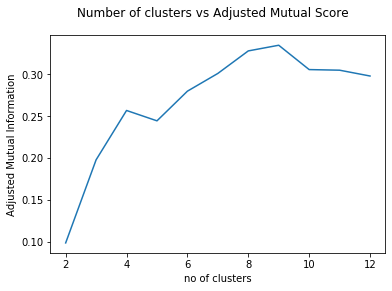

In [4]:
clusters = [2,3,4,5,6,7,8,9,10,11,12]
final_ami = []
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, random_state=1000, n_init=50).fit(trn_newsgroup,trn_newsgroup_targets)
    current_ami = adjusted_mutual_info_score(trn_newsgroup_targets,kmeans.labels_, average_method='max')
    final_ami.append(current_ami)
    print('AMI is {} for {} clusters'.format(current_ami, cluster))
    
plt.plot(clusters, final_ami)
plt.xlabel('no of clusters')
plt.ylabel('Adjusted Mutual Information')
plt.suptitle('Number of clusters vs Adjusted Mutual Score')

### ==== Question 2.5 ====|

The plot is related to what e could expect. Their seems to be a positive correlation between number of clusters and AMI up until 9, where the trend declines. This is expected as the ideal estimated clusters as discussed before should be 8. So it is somewhat unusual that the AMI is at its peak at 9. Also there is an unexpected a dramatic spike in AMI for 4 clusters, before the trend proceeds at a more normal increment. 

### ==== Question 2.6 ====

In [79]:
kmeans_four = KMeans(n_clusters=4, random_state=1000, n_init=50).fit(trn_newsgroup,trn_newsgroup_targets)

0       3
1       2
2       1
3       1
4       7
       ..
5643    6
5644    2
5645    5
5646    2
5647    3
Name: class, Length: 5648, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

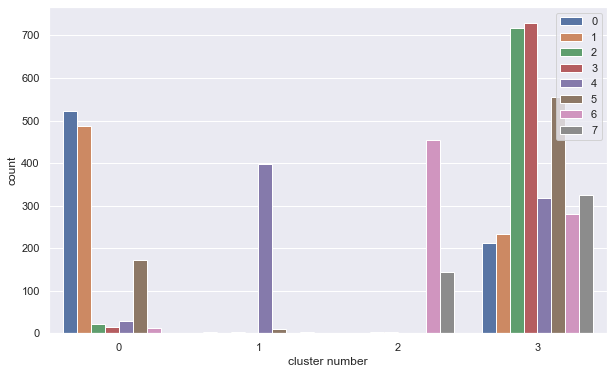

In [90]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x=kmeans_four.labels_, hue=trn_newsgroup_targets.values)
plt.xlabel('cluster number')
plt.show


### ==== Question 2.7 ==== 

In [91]:
ideal = np.unique(trn_newsgroup_targets, return_counts=True)
print(ideal)

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([737, 722, 742, 747, 743, 738, 748, 471]))


The clustering does not match the target labels. It seems to create 3 classes with less than expected and then proceeds to classify everything else as class 3. Considering the equal spreading of target labels in the real targets we would expect an even spread in the KMeans clustering for 4 clusters. This tells us that numerous classes in the original are not as distinct, since it classifies more than half of the documents in one single class. This is likely due to some of the topics being very similar, such as pc hardware, mac hardware,. Auto and motorcycles will group together, and religious classes will group together. 

## 3. Logistic Regression Classification 

### ==== Question 3.1 ====

The F1 score is an alternative measurement to accuracy that takes into account precision and recall. It is defined as the harmonic mean between precision and recall, i.e
\begin{equation}
2*precision*recall \over precision+recall
\end{equation}
where precision is the number of True positives over total positive classifications made by the classfier, and recall is the number of true positives over the real number of positives in the data set. F1 score is preferable to accuracy in our problem as it is more useful when there are unbalanced classes and when False Negatives and False Positives are crucial. 

### ==== Question 3.2 ====

The baseline classifier I will choose will assign every entry to the class with the highest prior probability. The reason I chose this is that it is a good starting point to compare our algorithm to one that simply has little to no logic or reasoning behind it other than a very simple calculation of which is the most common class. The accuracy is .1305 and the f1-score is 0.0292.

In [23]:
baseline = [3] * 1883
entries = 0
correct = 0
for entry in trn_newsgroup_targets:
    entries += 1
    if(baseline[entry] == trn_newsgroup_targets[entry]):
        correct += 1
    
print('accuracy is {}'.format(correct/entries))
f1_sco = sklearn.metrics.f1_score(tst_newsgroup_targets,baseline,average='macro')
print('f1 score is {}'.format(f1_sco))

accuracy is 0.1304886685552408
f1 score is 0.029197936210131333


/afs/inf.ed.ac.uk/user/s17/s1746788/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### ==== Question 3.3 ====

The logistic regression classifier can be applied to our multi class dataset by using the 'One vs rest' method. Which essentially performs the logistic regression treating one class as a 1 and all the rest as a 0.

### ==== Question 3.4 ====

In [48]:
X_train = trn_newsgroup.values
y_train = trn_newsgroup_targets.values
kfold = sklearn.model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
datasplit = kfold.split(trn_newsgroup, trn_newsgroup_targets)
f1_total = 0
sd_total = 0
trials = 0
multi_lr = sklearn.linear_model.LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=0)
for trn_index, tst_index in datasplit:
    X_trn, X_tst = X_train[trn_index], X_train[tst_index]
    y_trn, y_tst = y_train[trn_index], y_train[tst_index]
    
    train_lr = multi_lr.fit(X_trn, y_trn)
    final_lr = train_lr.predict(X_tst)
    f1 = sklearn.metrics.f1_score(y_tst, final_lr, average='macro')
    s_deviation = final_lr.std()
    f1_total = f1_total + f1
    sd_total = sd_total + s_deviation
    trials = trials + 1

print(f1_total/trials)
print(sd_total/trials)

0.6689909262264605
2.129198028415736


The average validation set F1-score is 0.6689909262264605 and the standard deviation is 2.129198028415736. Analyzing the F1-score first we can observe that the mean of precision and recall is about 67%, this means that the logistic regression classifier is far better then our baseline when it comes to classification. However the classifier is far from polished and has a pretty unnaceptabble predictive rate for real world applications. The standard deviation of 2.13 is fairlynormal considering the 8 integer ranges of values.

### ==== Question 3.5 ====

/afs/inf.ed.ac.uk/user/s17/s1746788/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/afs/inf.ed.ac.uk/user/s17/s1746788/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/afs/inf.ed.ac.uk/user/s17/s1746788/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/afs/inf.ed.ac.uk/user/s17/s1746788/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samp

/afs/inf.ed.ac.uk/user/s17/s1746788/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/afs/inf.ed.ac.uk/user/s17/s1746788/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/afs/inf.ed.ac.uk/user/s17/s1746788/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/afs/inf.ed.ac.uk/user/s17/s1746788/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samp

/afs/inf.ed.ac.uk/user/s17/s1746788/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s17/s1746788/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s17/s1746788/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s17/s1746788/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s17/s1746788/.local/lib/python3.6/site-packages/sklearn/l

/afs/inf.ed.ac.uk/user/s17/s1746788/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s17/s1746788/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s17/s1746788/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s17/s1746788/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s17/s1746788/.local/lib/python3.6/site-packages/sklearn/l

/afs/inf.ed.ac.uk/user/s17/s1746788/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s17/s1746788/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s17/s1746788/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s17/s1746788/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s17/s1746788/.local/lib/python3.6/site-packages/sklearn/l

[1.00000000e-04 3.16227766e-04 1.00000000e-03 3.16227766e-03
 1.00000000e-02 3.16227766e-02 1.00000000e-01 3.16227766e-01
 1.00000000e+00 3.16227766e+00 1.00000000e+01 3.16227766e+01
 1.00000000e+02 3.16227766e+02 1.00000000e+03 3.16227766e+03
 1.00000000e+04 3.16227766e+04 1.00000000e+05]
[0.10426652383342358, 0.20693715644729802, 0.3978221586555387, 0.549401889558099, 0.5903162727489074, 0.6007943890141922, 0.6231661213731126, 0.6632928459845525, 0.6689909262264605, 0.6618615893645126, 0.6508673013752745, 0.6351927624582812, 0.6306581456843349, 0.6290397926441792, 0.6265514299120727, 0.6260673442815328, 0.6212917640148401, 0.622603362670217, 0.6196887999912131]


/afs/inf.ed.ac.uk/user/s17/s1746788/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Text(0.5, 0.98, 'F1 scores as C increases')

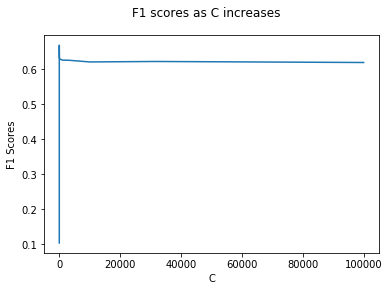

In [55]:
X_train = trn_newsgroup.values
y_train = trn_newsgroup_targets.values
Cs = np.logspace(start=-4, stop=5, num=19, base=10)
f_scores = []
for C in Cs:
    multi_lr = sklearn.linear_model.LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=0, C=C)
    kfold = sklearn.model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    datasplit = kfold.split(trn_newsgroup, trn_newsgroup_targets)
    f1_total = 0
    trials = 0
    for trn_index, tst_index in datasplit:
        X_trn, X_tst = X_train[trn_index], X_train[tst_index]
        y_trn, y_tst = y_train[trn_index], y_train[tst_index]

        train_lr = multi_lr.fit(X_trn, y_trn)
        final_lr = train_lr.predict(X_tst)
        f1 = sklearn.metrics.f1_score(y_tst, final_lr, average='macro')
        s_deviation = final_lr.std()
        f1_total = f1_total + f1
        sd_total = sd_total + s_deviation
        trials = trials + 1
    average_f = f1_total/trials
    f_scores.append(average_f)
print(Cs)
print(f_scores)
plt.plot(Cs, f_scores)
plt.xlabel('C')
plt.ylabel('F1 Scores')
plt.suptitle('F1 scores as C increases')

In [64]:
index = f_scores.index(max(f_scores))
Cs[index]

1.0

### ==== Question 3.6 ====

The Optimal value of C is 1.0. The reason i chose this value is that it results in the largest f1-score. The graph shows a dramatic increase over a very miniscule interval around 0, and then a sharp draw followed by a constant at ~0.62. C represents the inverse of regularization strength. Therefore the graph is about what we would expect. The first few values of C, and their respective F1-scores are a result of the clasifier underfitting. Then once the fitting has reached its ideal at C = 1, then the following values result in overfitting which means that even though the classifier is somewhat accurate, it is not as good as the ideal C value since the overfitting results in an overly complex classifier which is too closely fitted to limited datapoints.

### ==== Question 3.7 =====

In [71]:
multi_lr3 = sklearn.linear_model.LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=0, C=1, max_iter=200)
train_lr3 = multi_lr3.fit(trn_newsgroup.values, trn_newsgroup_targets.values)
final_lr3 = train_lr3.predict(tst_newsgroup.values)
f13 = sklearn.metrics.f1_score(tst_newsgroup_targets.values, final_lr3, average='macro')
print(f13)

0.6747698176259582


The score of the best model(C=1) on the entire dataset is 0.6747698176259582. F1-score has increased slightly, and is definetly a lot better then the baseline classifier. Once again 67% for the mean of precision and recall is decent but certainly not sufficient for real life endevours, and a human could probably do a lot better.

## 4. Exploratory Analysis

In [2]:
data_path = os.path.join(os.getcwd(), 'Data', 'PartB', 'BristolAir_Exploratory.csv')
bristol_exp = pd.read_csv(data_path, delimiter=',', compression='bz2')

### ==== Question 4.1 ====

In [3]:
bristol_exp.describe()

,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
count,1.191220e+06,1.188426e+06,1.197536e+06,1.306758e+06,1.306758e+06,1.306758e+06
mean,1.200819e+02,4.493445e+01,4.956930e+01,8.411554e+00,5.145213e+01,-2.580516e+00
std,1.428863e+02,3.183197e+01,7.645375e+01,5.329009e+00,1.607845e-02,2.738316e-02
min,-3.108000e+01,-6.669844e+00,-1.771000e+01,0.000000e+00,5.142786e+01,-2.688779e+00
25%,3.550000e+01,2.200000e+01,7.000000e+00,4.000000e+00,5.144175e+01,-2.592724e+00
50%,7.300000e+01,3.800000e+01,2.200000e+01,7.000000e+00,5.145543e+01,-2.582253e+00
75%,1.450000e+02,5.950000e+01,5.700000e+01,1.400000e+01,5.146067e+01,-2.562714e+00
max,2.164250e+03,5.765000e+02,1.231250e+03,1.700000e+01,5.148999e+01,-2.535230e+00


In [4]:
bristol_exp.head(10)

,Date Time,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
0,2007-03-27 13:00:00+00:00,87.00,28.00,28.75,1,51.441747,-2.559956
1,2007-03-27 14:00:00+00:00,98.50,32.00,32.50,1,51.441747,-2.559956
2,2007-03-27 20:00:00+00:00,202.00,97.75,68.00,6,51.427864,-2.563742
3,2007-03-28 02:00:00+00:00,107.80,39.52,44.52,8,51.489993,-2.688779
4,2007-03-28 04:00:00+00:00,115.78,31.94,54.67,8,51.489993,-2.688779
5,2007-03-28 07:00:00+00:00,410.50,49.50,218.25,1,51.441747,-2.559956
6,2007-03-28 08:00:00+00:00,295.48,53.35,157.87,8,51.489993,-2.688779
7,2007-03-28 12:00:00+00:00,129.75,39.50,45.50,1,51.441747,-2.559956
8,2007-03-28 13:00:00+00:00,162.86,69.53,60.85,8,51.489993,-2.688779
9,2007-03-28 13:00:00+00:00,217.75,86.00,86.25,10,51.460674,-2.582253


In [11]:
bristol_exp.shape[0]

1306758

In [5]:
np.unique(bristol_exp['SiteID'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [6]:

bristol_exp_check = bristol_exp[bristol_exp['NOx'] >= 0]
bristol_exp_check2 = bristol_exp_check[bristol_exp_check['NO2'] >= 0]
bristol_exp_check3 = bristol_exp_check2[bristol_exp_check2['NO'] >= 0]

print(bristol_exp.shape[0])
print(bristol_exp.shape[0]-bristol_exp_check3.shape[0])

1306758
119445


By using the describe method among others, we can interpret what the data is about and discern its key features. First off the data is regarding the air quality/content in different areas of bristol. The columns hold information on the time(Date and Time) and coordinates(Latitude and Longitude) as well as a number to identify the site were the entry is from. The rest of the columns are regarding the amount of different Nitrous Oxides in the air. Their are 7 columns and 1,306,758 entries(rows). This is a substantial amount of data, and a thorough and correct analysis can prove to be valuable. Their are 18 unique sites numbered 0-17. Their seem to be a lot of negative and zero values(119,058) for Nitrous Oxide content, which seems to show their are some corrupted or clearly miscalculated data points in the data set. They are unreasonable as trace amounts of nitrous oxides are everywhere in the atmosphere, and obviously negative values of chemical content are out of the question as well for that reason. 

### ==== Question 4.2 ====

In [7]:
coo = 0
#t = newTable("Problematic Samples in Sites",17,2)
#t.setColName(1,'Samples')
#t.setColName(2,'Percentage Problematic')
IDs = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
total = []
problematic_ratios = []
row = 1
for key, item in bristol_exp.groupby(['SiteID']):
    first = bristol_exp.groupby(['SiteID']).get_group(key).isnull().any(axis=1) # missing
    second = (bristol_exp.groupby(['SiteID']).get_group(key).iloc[:,1:4] <= 0).all(1) # negative
    boolean_list = first | second 
    problematic_samples = boolean_list.value_counts()[1]
    total_samples = len(boolean_list)
    total.append(total_samples)
    percentage_problematic = problematic_samples * 100 / total_samples
    problematic_ratios.append(percentage_problematic)
    row += 1
    print('Problematic samples for site ' + str(key) + ' is: ' + str(problematic_samples))
    print('Total number of samples for site ' + str(key) + ' is: ' + str(total_samples))
    print('Percentage of problematic samples for site ' + str(key) 
          + ' is: ' + str(percentage_problematic) + "%")
    print("====================================================")
    coo = coo+ problematic_samples
print(coo)
table = pd.DataFrame({'SiteID':IDs, 'total samples':total,'problematic percentages':problematic_ratios})
table.head(18)
table.to_latex()

Problematic samples for site 0 is: 104
Total number of samples for site 0 is: 6446
Percentage of problematic samples for site 0 is: 1.6134036611852312%
Problematic samples for site 1 is: 10262
Total number of samples for site 1 is: 163111
Percentage of problematic samples for site 1 is: 6.29142117944222%
Problematic samples for site 2 is: 2740
Total number of samples for site 2 is: 62990
Percentage of problematic samples for site 2 is: 4.349896809017304%
Problematic samples for site 3 is: 19761
Total number of samples for site 3 is: 25464
Percentage of problematic samples for site 3 is: 77.60367577756833%
Problematic samples for site 4 is: 1547
Total number of samples for site 4 is: 74787
Percentage of problematic samples for site 4 is: 2.0685413240269033%
Problematic samples for site 5 is: 10066
Total number of samples for site 5 is: 113952
Percentage of problematic samples for site 5 is: 8.83354394832912%
Problematic samples for site 6 is: 10581
Total number of samples for site 6 is:

'\\begin{tabular}{lrrr}\n\\toprule\n{} &  SiteID &  total samples &  problematic percentages \\\\\n\\midrule\n0  &       0 &           6446 &                 1.613404 \\\\\n1  &       1 &         163111 &                 6.291421 \\\\\n2  &       2 &          62990 &                 4.349897 \\\\\n3  &       3 &          25464 &                77.603676 \\\\\n4  &       4 &          74787 &                 2.068541 \\\\\n5  &       5 &         113952 &                 8.833544 \\\\\n6  &       6 &         142141 &                 7.444017 \\\\\n7  &       7 &         115162 &                 4.201907 \\\\\n8  &       8 &          43824 &                21.063801 \\\\\n9  &       9 &          22071 &                 5.301074 \\\\\n10 &      10 &          96407 &                 3.591026 \\\\\n11 &      11 &          20693 &                 1.933021 \\\\\n12 &      12 &          45240 &                17.484527 \\\\\n13 &      13 &          12423 &                52.145215 \\\\\n14 &    

### ==== Question 4.3 ====

To summarise my findings in terms of problematic entry percentages, we can divide each site into 4 distinct groups. The first is relatively miniscule problematic percentage and consists of sites 0,4, and 11; having ~1.5-2% problematic entries. The second is relatively small problematic percentage that consists of 1, 2, 5, 6, 7, 9, 10, 16, 17; having ~3-9% problematic entries. The third is relatively large problematic percentages and consists of 8, 12, 14; having ~10-21%. The final group is extremely large problematic percentage entries consisting of 3, 13, 15, having ~50-100% problematic entries. In terms of number of entries we can say that site 15 and 0 have a relatively miniscule amount of entries. Sites 1, 3, 9, 11, 13 have a small amount of entries. Sites 2, 8, 12 have a relatively large amount of entries. Sites , 4, 5, 6, 7, 10, 14, 16, 17 have an extremely large amount of entries.

### ==== Question 4.4 ====

In [8]:
bristol_exp_no15 = bristol_exp[bristol_exp['SiteID'] != 15]
bristol_exp_no153 = bristol_exp_no15[bristol_exp_no15['SiteID']!= 3]
print(bristol_exp_no153[['NOx','NO','NO2']].corr().to_latex())
print(bristol_exp_no153[['NOx','NO','NO2']].corr())


\begin{tabular}{lrrr}
\toprule
{} &       NOx &        NO &       NO2 \\
\midrule
NOx &  1.000000 &  0.988019 &  0.878016 \\
NO  &  0.988019 &  1.000000 &  0.807853 \\
NO2 &  0.878016 &  0.807853 &  1.000000 \\
\bottomrule
\end{tabular}

          NOx        NO       NO2
NOx  1.000000  0.988019  0.878016
NO   0.988019  1.000000  0.807853
NO2  0.878016  0.807853  1.000000


### ==== Question 4.5 ====

NOx and NO content seem to have an almost perfectly linear/proportional correlation. For NOx and NO2 there is still a strong positive correlation but not to the same degree as NOx and NO. Finally the weakest correlation occurs between NO2 and NO, however, it is still a significant positive correlation.

### Question 4.6

In [9]:
data_path = os.path.join(os.getcwd(), 'Data', 'PartB', 'BristolAir_SiteAligned.csv')
bristol_ali = pd.read_csv(data_path, delimiter=',', compression='bz2', header=[0,1], parse_dates=[0])

In [10]:
bristol_ali.head(5)

Date Time    NOx                                        \
         Unnamed: 0_level_1      1       2       4       6     7      10   
0 2009-03-14 04:00:00+00:00  10.50   15.25   21.50   23.75   8.0   53.25   
1 2009-03-14 05:00:00+00:00   9.75    9.50   11.50   23.25  10.0   30.50   
2 2009-03-15 17:00:00+00:00  67.25   88.75   66.00  163.75  36.0  203.75   
3 2009-03-17 13:00:00+00:00  71.75  124.50  135.00   96.50  38.0  172.50   
4 2009-03-17 15:00:00+00:00  82.00  125.00  104.25  106.50  36.0  193.00   

                         ...     NO                                          \
      12      14     16  ...      1      2      4      6    7     10     12   
0   19.0  201.75   40.0  ...   2.75   2.25   4.00   8.75  0.0  12.50    3.0   
1   19.0  138.00   42.0  ...   3.00   2.75   3.00   8.50  0.0   5.75    3.0   
2  155.0  429.00   94.0  ...  18.25  27.00  16.50  57.25  3.0  69.75   51.0   
3  338.0  734.00  196.5  ...  17.75  53.25  46.25  34.75  6.0  61.50  139.0   
4  321.0  679.00  329.0  ...  21.50  47.50  34.25  36.50  5.0  63.75  130.0   

                          
       14      16     17  
0   64.75   12.50   2.50  
1   38.50   12.25   2.25  
2  177.00   21.50  28.50  
3  345.50   71.00  47.00  
4  305.25  134.25  45.50  

[5 rows x 31 columns]

In [12]:
bristol_ali_sites = bristol_ali.drop('Date Time',1)

/afs/inf.ed.ac.uk/user/s17/s1746788/.local/lib/python3.6/site-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


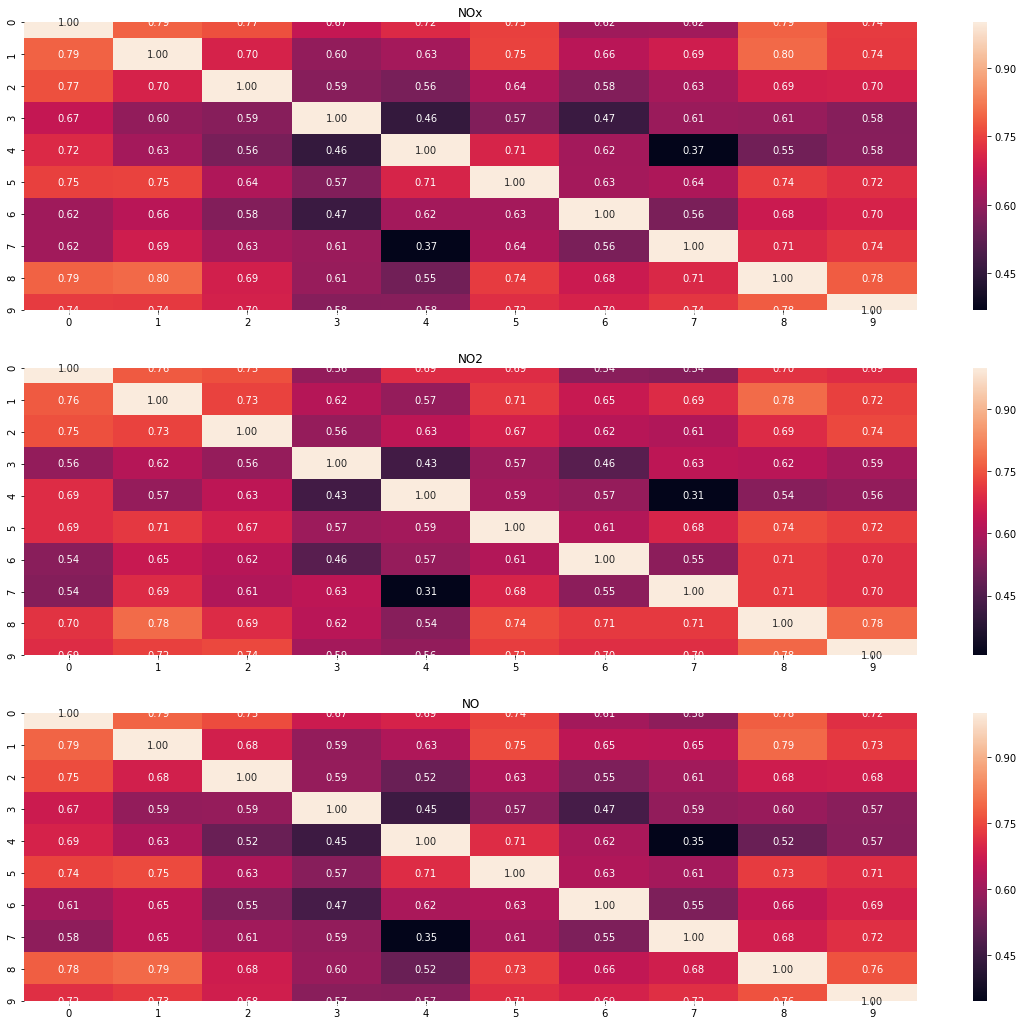

In [13]:
fig, ax = plt.subplots(3,1, figsize=(20,18))

ax[0].set_title('NOx')
ax[1].set_title('NO2')
ax[2].set_title('NO')
bristol_NO = np.array(bristol_ali_sites['NO'].corr())
bristol_NO2= np.array(bristol_ali_sites['NO2'].corr())
bristol_NOx= np.array(bristol_ali_sites['NOx'].corr())
plot_matrix(matrix=bristol_NOx, ax = ax[0], show_val=True, mode='heatmap')
plot_matrix(matrix=bristol_NO2, ax = ax[1], show_val=True, mode='heatmap')
plot_matrix(matrix=bristol_NO, ax = ax[2], show_val=True, mode='heatmap')


### ==== Question 4.7 ====

Analysing the results from question 4.6, and starting off with NO; we can see that their are strong positive correlations between all sites(between ~0.4 and ~0.8).Furthermore, in the case of NO2 and NOx we can see similar correlations as for the NO case. This is a very reasonable occurence, as we would expect places in the same geographic region(Bristol), to have similar air pollution levels. 

## 5. Principal  Component Analysis

### ==== Question 5.1 ====

In [14]:
data_path = os.path.join(os.getcwd(), 'Data', 'PartB', 'BristolAir_DayAligned.csv')
bristol_day = pd.read_csv(data_path, delimiter=',', compression='bz2')


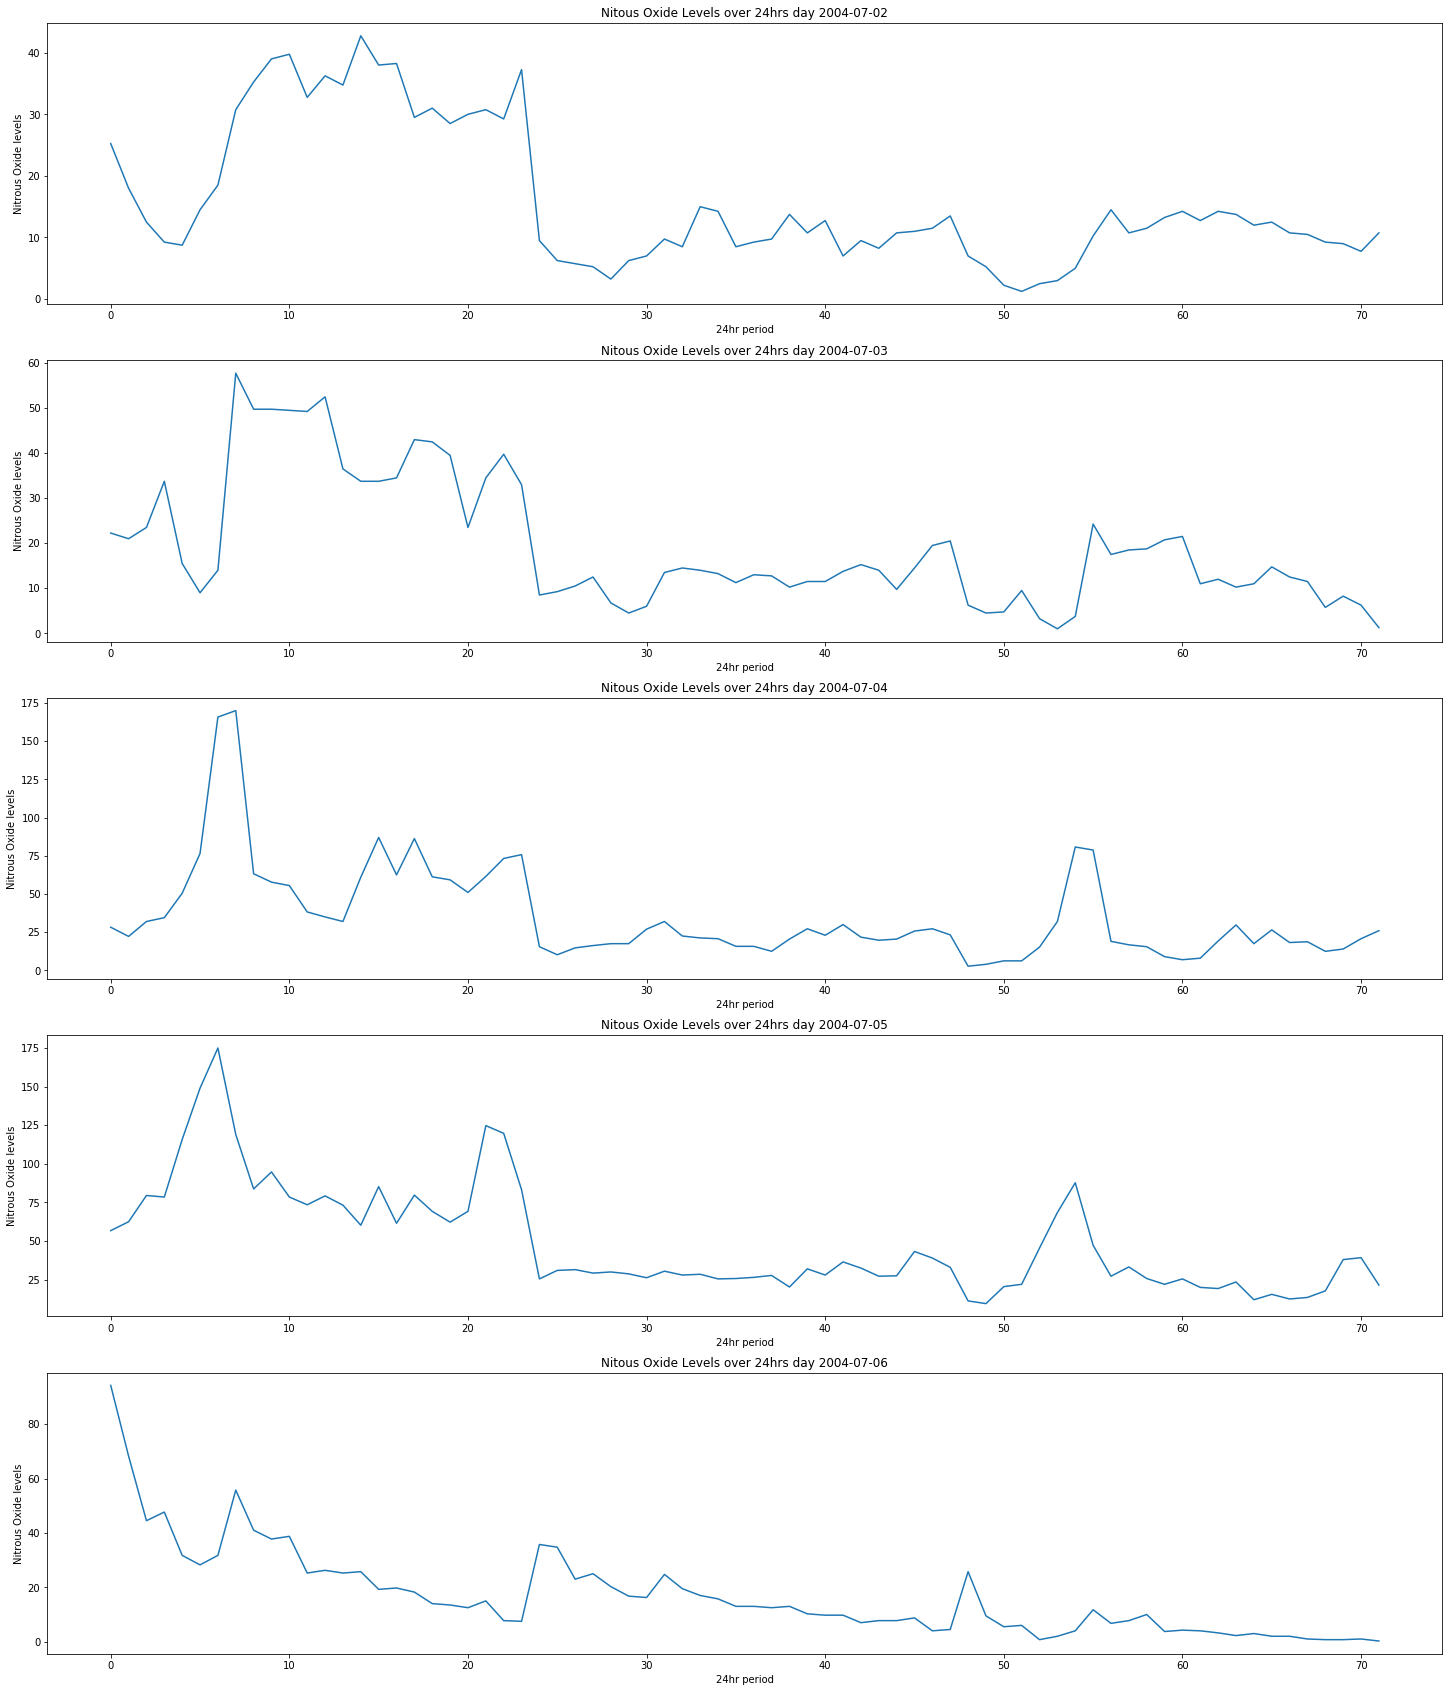

In [15]:
five_plot_day = bristol_day['Date'].values
five_plot_data = bristol_day.drop(['Date', 'SiteID'],1).values
fig, plots = plt.subplots(5,1, figsize=(25,30))
points = range(0,72)
for entry in range(5):
    plots[entry].plot(points,five_plot_data[entry])
    plots[entry].set_xlabel('24hr period')
    plots[entry].set_ylabel('Nitrous Oxide levels')
    plots[entry].set_title('Nitous Oxide Levels over 24hrs day ' + five_plot_day[entry])


### ==== Question 5.2 ====

In [16]:
site_one = bristol_day[bristol_day['SiteID'] == 1]
site_one_pca = site_one.drop(['SiteID', 'Date'], 1)
pca = PCA(n_components = 72, random_state = 0)
fitted = pca.fit(site_one_pca)


10

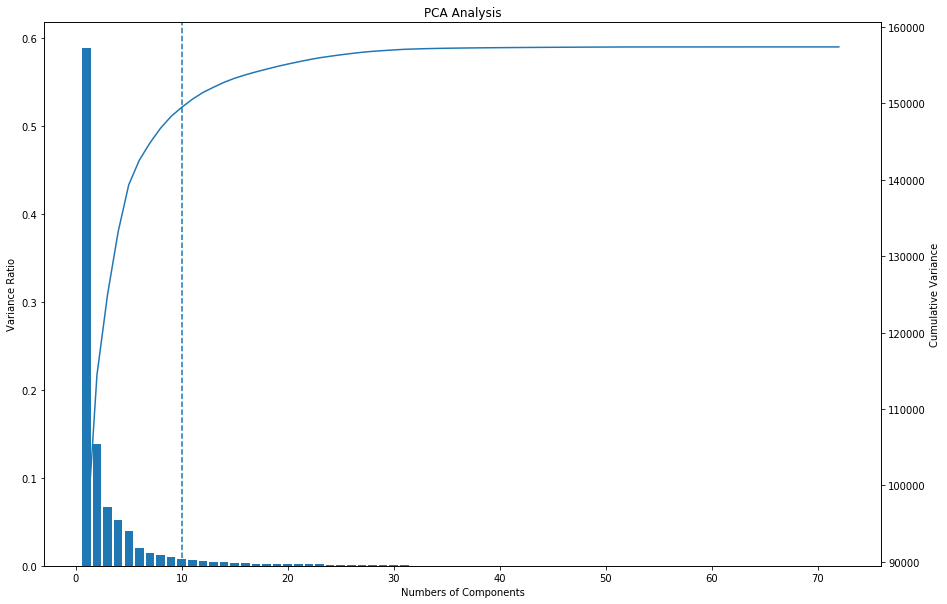

In [147]:
fig, ax1 =plt.subplots(figsize =(15,10))
ax2 = ax1.twinx()
ax1.set_xlabel('Numbers of Components')
plt.title('PCA Analysis')
ax1.set_ylabel('Variance Ratio')
ax2.set_ylabel('Cumulative Variance')

percentage_variance = fitted.explained_variance_ratio_
n_components = range(1,73)
cum_var = np.cumsum(fitted.explained_variance_)

ax1.bar(n_components,percentage_variance)
ax1.axvline(10, linestyle='--')
ax2.plot(n_components, cum_var)
poo = np.cumsum(fitted.explained_variance_ratio_)
np.argmax(poo >= 0.95)

### ==== Question 5.3 ====

It is very apparent from the graph that there exists an inversely proportional relationship between the Variance Ratio and Cumulative variance. The cumulative variance has a logarithmic shape while the variance ratio takes the form of an inverse logarithmic shape as the number of principal components increases. 

### ==== Question 5.4 ====

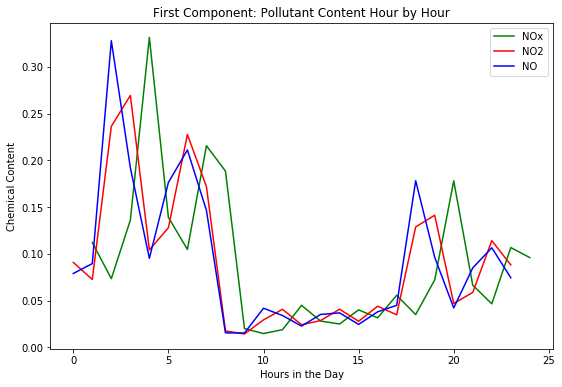

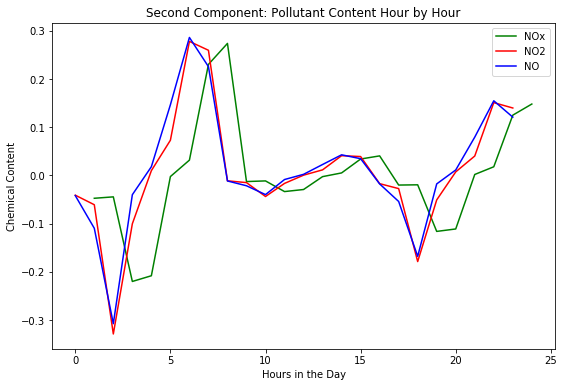

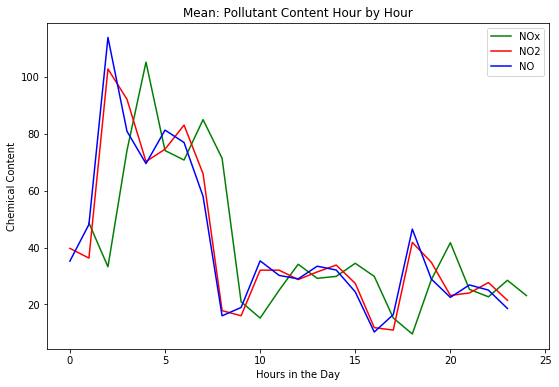

In [17]:
day = range(1,25)
my_components = []
my_components.append(fitted.components_[0])
my_components.append(fitted.components_[1])
my_components.append(fitted.mean_)

first = my_components[0]
first = np.reshape(first, order = 'F', newshape=(3,24))
second = my_components[1]
second = np.reshape(second, order = 'F', newshape=(3,24))
third = my_components[2]
third = np.reshape(third, order = 'F', newshape=(3,24))

fig, line1 =plt.subplots(figsize =(9,6))

plt.title('First Component: Pollutant Content Hour by Hour')
line1.set_xlabel('Hours in the Day')
line1.set_ylabel('Chemical Content')
line1.plot(day, first[0], c ='g')
line1.plot(first[1], c = 'r')
line1.plot(first[2], c = 'b')
plt.legend(['NOx', 'NO2', 'NO'], loc='upper right')

fig, line2 =plt.subplots(figsize =(9,6))

plt.title('Second Component: Pollutant Content Hour by Hour')
line2.set_xlabel('Hours in the Day')
line2.set_ylabel('Chemical Content')
line2.plot(day, second[0], c ='g')
line2.plot(second[1], c = 'r')
line2.plot(second[2], c = 'b')
plt.legend(['NOx', 'NO2', 'NO'], loc='upper right')

fig, line3 =plt.subplots(figsize =(9,6))

plt.title('Mean: Pollutant Content Hour by Hour')
line3.set_xlabel('Hours in the Day')
line3.set_ylabel('Chemical Content')
line3.plot(day, third[0], c ='g')
line3.plot(third[1], c = 'r')
line3.plot(third[2], c = 'b')
plt.legend(['NOx', 'NO2', 'NO'], loc='upper right')

### ==== Queston 5.5 ====

We can see that the first principal component is quite similar to the mean in terms of the general trends of the Nitrous Oxides. It seems like there is a sharp increase in contaminants at the beggining of the day followed by a sharp decline, staying around zero for the middle part of the day. Finally there is a partial rise in air contamination towards the end of the day. This seems to fit in well with what we would expect, as we see a large rise in traffic during the morining rush hour, contaminating the air more significantly. Then the trend around zero in the midle is likely the result of people being in school and work and therefore, not generating these air pollutants. Finally in the afternoon and evening we can see that people coming back from work, school, or other commitments leads to an increase in contaminants. We can see that the scales are different when coparing the mean and first component. The mean has a range of 0 to about 120, while the first component takes a range of values between 0 and 0.35. Looking at the pollutants we can observe that a rise or fall in NO2 and NO often precedes a rise or fall in NOx. This may tell us that NOx actually forms as a result of NO and NO2 reacting together or with other elements in the air.

## 6. Regression 

In [36]:
data_path = os.path.join(os.getcwd(), 'Data', 'PartB', 'BristolAir_SiteAligned.csv')
bristol_siteali = pd.read_csv(data_path, delimiter=',', compression='bz2', header=[0,1])
NOx_ali = bristol_siteali['NOx']
NOx_features = NOx_ali.drop(['17'], 1)
NOx_targets = NOx_ali['17']
print(NOx_features.head(7))
print(NOx_targets.head(4))


       1       2       4       6     7      10     12      14      16
0  10.50   15.25   21.50   23.75   8.0   53.25   19.0  201.75   40.00
1   9.75    9.50   11.50   23.25  10.0   30.50   19.0  138.00   42.00
2  67.25   88.75   66.00  163.75  36.0  203.75  155.0  429.00   94.00
3  71.75  124.50  135.00   96.50  38.0  172.50  338.0  734.00  196.50
4  82.00  125.00  104.25  106.50  36.0  193.00  321.0  679.00  329.00
5  62.75  108.00  132.75  102.50  46.0  163.50  393.0  682.00  277.25
6  71.25  132.00  149.75   82.25  52.0  208.25  435.0  867.75  371.25
0     41.00
1     37.00
2    127.25
3    150.50
Name: 17, dtype: float64


### ==== Question 6.1 ==== 

In [79]:
mws = multi_way_split(NOx_targets.values, sizes=(.6,.15,.25), splitter=ShuffleSplit, random_state=0)
train_set = mws[0]
valid_set = mws[1]
test_set = mws[2]
print('train size is {}, validation size is {} and test size is {}'.format(len(train_set), len(valid_set), len(test_set)))

train size is 8937, validation size is 2234 and test size is 3724


array([ 8550,  5582,  3153, ...,  9845, 10799,  2732])

The training set size is 8937, validation set size is 2234 and testing set size is 3724


### ==== Question 6.2 ==== 

A good baseline regressor we can use is one that simply takes the mean of the y values and predicts this value for all entries. 

In [177]:
NOx_x = NOx_features.values
NOx_y = NOx_targets.values

NOx_X = []
NOx_Y = []
for entry in range(0,8937):
    NOx_X.append(NOx_x[train_set[entry]])
    NOx_Y.append(NOx_y[train_set[entry]])

NOx_Xvalid = []
NOx_Yvalid = []
for entry in range(0,2234):
    NOx_Xvalid.append(NOx_x[valid_set[entry]])
    NOx_Yvalid.append(NOx_y[valid_set[entry]])
    
NOx_Xtest = []
NOx_Ytest = []
for entry in range(0,3724):
    NOx_Xtest.append(NOx_x[test_set[entry]])
    NOx_Ytest.append(NOx_y[test_set[entry]])

In [190]:
mean_array = []
mean_array_validation = []
for entry in NOx_Y:
    mean_array.append(np.mean(NOx_targets.values))
rmse_mean = sklearn.metrics.mean_squared_error(NOx_Y, mean_array)
for etr in NOx_Yvalid:
    mean_array_validation.append(np.mean(NOx_targets.values))
rmse_mean_validation = sklearn.metrics.mean_squared_error(NOx_Yvalid,mean_array_validation)
print(np.sqrt(rmse_mean))
print(np.sqrt(rmse_mean_validation))

79.71428788140615
80.21061649413826


The RMSE is 79.59556187848831 for the training data and for the validation set 80.21061649413826, which are signficantly large numbers considering the values taken by the 25 and 75 percent brackets are limited to a range of ~ (133-41 = 92). However, it is an effective baseline to set since it uses very limited computation and is a very crude and improvised regressor. 

### ==== Question 6.3 ====  

In [179]:
NOx_x[train_set[8936]]

array([ 62.  ,  75.  ,  59.5 , 144.5 ,  27.  , 122.  ,  59.  , 448.75,
       118.5 ])

In [180]:
LR = LinearRegression()

In [181]:
lr_train_analyze = LR.fit(NOx_X, NOx_Y)
train_prediction = lr_train_analyze.predict(NOx_X)
rmse_train = sklearn.metrics.mean_squared_error(NOx_Y,train_prediction)
print(np.sqrt(rmse_train))

lr_valid_analyze = LR.fit(NOx_X, NOx_Y)
valid_prediction = lr_valid_analyze.predict(NOx_Xvalid)
rmse_valid = sklearn.metrics.mean_squared_error(NOx_Yvalid, valid_prediction)
print(np.sqrt(rmse_valid))

39.83472027954455
41.12740349422


The RMSE on the training and validation set respectively are 39.83472027954455 and 41.12740349422. This is substantially better than the baseline regressor. Also it makes sense that the training set had a slightly better RMSE since we trained the linear regression on the training data itself.

### ==== Question 6.4 ==== 

It is extremely important to normalize the weights of the regression coefficients since different features can tke different ranges and significantly different scales. This can lead to some important features with smaller scales being overshadowed by less important features with larger scales and ranges. In SKLearn normalization occurs before regression by subtracting the mean and dividing by the l2-norm. Normalization does affect the linear regressor, often improving it. It helps comparing features by bringing the features down to a common scale and size, thereby not over or underestimating features with smaller or larger ranges and values. 

### ==== Question 6.5 ==== 

In [195]:
LR_normalize = LinearRegression(normalize=True)
normal_train = LR_normalize.fit(NOx_X, NOx_Y)
normal_prediction = normal_train.predict(NOx_X)
mse_normal = sklearn.metrics.mean_squared_error(NOx_Y, normal_prediction)
rmse_normal =np.sqrt(mse_normal)
normal_train.coef_
table_coefficients = pd.DataFrame({'SiteID':[1, 2, 4, 6, 7, 10, 12, 14, 16], 'Coefficients':normal_train.coef_ })
table_coefficients.to_latex()

'\\begin{tabular}{lrr}\n\\toprule\n{} &  SiteID &  Coefficients \\\\\n\\midrule\n0 &       1 &      0.115556 \\\\\n1 &       2 &      0.009947 \\\\\n2 &       4 &      0.134139 \\\\\n3 &       6 &     -0.006799 \\\\\n4 &       7 &      0.059388 \\\\\n5 &      10 &      0.079779 \\\\\n6 &      12 &      0.129110 \\\\\n7 &      14 &      0.094507 \\\\\n8 &      16 &      0.161828 \\\\\n\\bottomrule\n\\end{tabular}\n'

The most important site  is number 16, with a coefficient of 0.16182776. The least important site is number 6 with a coefficient of -0.00679908. The correlation coefficients in 4.6 are much larger than the ones present in this regressor. The reason for could be that we are normalizing this time, which we did not do before. This is probably the case, since in normalizing we are removing the inherent similarities of chemical contents in the air, and are working purely in the dimension of Bristol air scale. A good analogy to explain this is male height. Because most men are within similar ranges of heights, without normalization the correlation of height between any genetically distant subset of men and another would be near 1, since most adult men are within 1.70-1.90(a difference of only 10%). However if we normalize, and remove the inherent default height of a male, which accounts for this correlation, then the new correlation will be close to zero. In normalizing the data for NOx, we are removing the inherent levels of chemical contamination that are independent of the sites and pollution levels. 

### ==== Question 6.6 ==== 

In [183]:
KNN = KNeighborsRegressor(n_jobs=-1)
KNN_regressor = KNN.fit(NOx_X, NOx_Y)
KNN_train = KNN_regressor.predict(NOx_X)
KNN_valid = KNN_regressor.predict(NOx_Xvalid)
KNN_train_mse = sklearn.metrics.mean_squared_error(NOx_Y, KNN_train)
KNN_valid_mse = sklearn.metrics.mean_squared_error(NOx_Yvalid, KNN_valid)
print(np.sqrt(KNN_train_mse))
print(np.sqrt(KNN_valid_mse))

32.43647936515854
40.3071558368958


The KNN regressor performs a lot better with the training set, with an RMSE of 32.43647936515854. However, the performance on the validation set is only marginally better, with an RMSE of 40.3071558368958. An important limitation of the KNN on our dataset is that KNN is since our data set is continuous, this means our regressor is prone to overfitting. Therefore, new data that belongs to a certain class but does not conform exactly to observations the regressor classified on, it may be misclassified.

### ==== Question 6.7 ==== 

[42.95551269008171, 40.595609577419665, 39.37125304834977, 38.901851355962386, 39.13083888473987, 39.64872218133467]
[25.149918774899085, 31.42280882774953, 34.11215836361028, 35.47142878389425, 36.715347607557376, 38.11248024530105]
3


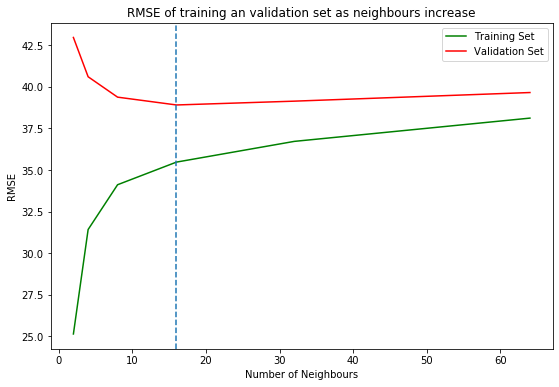

In [184]:
neighbors = [2, 4, 8, 16, 32, 64]
rmse_validation = []
rmse_training = []
for value in neighbors:
    KNN_optimise = KNeighborsRegressor(n_neighbors=value, n_jobs=-1)
    KNN_optimise_regressor = KNN_optimise.fit(NOx_X, NOx_Y)
    KNN_optimise_train = KNN_optimise_regressor.predict(NOx_X)
    KNN_optimise_valid = KNN_optimise_regressor.predict(NOx_Xvalid)
    rmse_training.append(np.sqrt(sklearn.metrics.mean_squared_error(NOx_Y, KNN_optimise_train)))
    rmse_validation.append(np.sqrt(sklearn.metrics.mean_squared_error(NOx_Yvalid, KNN_optimise_valid)))
print(rmse_validation)
print(rmse_training)

fig, rmse =plt.subplots(figsize =(9,6))

plt.title('RMSE of training an validation set as neighbours increase')
rmse.set_xlabel('Number of Neighbours')
rmse.set_ylabel('RMSE')
rmse.plot(neighbors, rmse_training, c ='g')
rmse.plot(neighbors, rmse_validation, c = 'r')
plt.legend(['Training Set', 'Validation Set'], loc='upper right')

rmse.axvline(16, linestyle='--')
print(np.argmin(rmse_validation))

### ==== Question 6.8 ==== 

The best RMSE performance for the validation set occurs at 16 neighbors, with a value of 38.901851355962386. 

### ==== Question 6.9 ==== 

0.09114909269816067


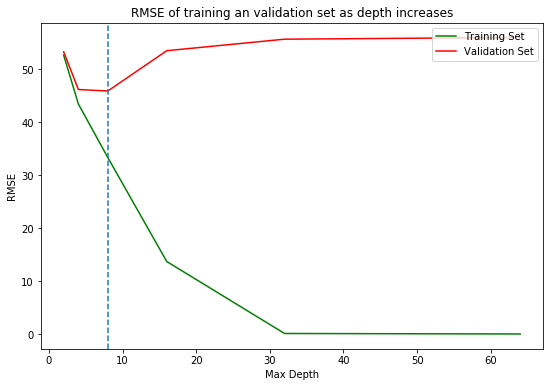

In [185]:
depths = [2, 4, 8, 16, 32, 64]
dtr_training = []
dtr_validation = []
for depth in depths:
    DTR = DecisionTreeRegressor(max_depth=depth, random_state=0)
    dtr_train = DTR.fit(NOx_X, NOx_Y)
    dtr_trainpredict = dtr_train.predict(NOx_X)
    dtr_valid = dtr_train.predict(NOx_Xvalid)
    dtr_training.append(np.sqrt(sklearn.metrics.mean_squared_error(NOx_Y, dtr_trainpredict)))
    dtr_validation.append(np.sqrt(sklearn.metrics.mean_squared_error(NOx_Yvalid, dtr_valid)))

fig, rmseT =plt.subplots(figsize =(9,6))

plt.title('RMSE of training an validation set as depth increases')
rmseT.set_xlabel('Max Depth')
rmseT.set_ylabel('RMSE')
rmseT.plot(depths, dtr_training, c ='g')
rmseT.plot(depths, dtr_validation, c = 'r')
plt.legend(['Training Set', 'Validation Set'], loc='upper right')

rmseT.axvline(8, linestyle='--')
print(dtr_training[4])80.21061649413826

### ==== Question 6.10 ==== 

The best RMSE performance for the validation set occurs at a max depth of 8, with a value of 45.84380928287788. For the validation set, the Decision Tree Regressor improves from 2-8 and then gets worse for 16 and then normalizes at just above 50. For the training set, the regressor improves drastically until max depth 32 where the training data is perfectly predicted from 32 onwards. The only thing both validation regression and training regression seem to have in common is that they stay constant after a certain depth. This probably has to do with the tree being unable to further divide features, and therefore the regressor cannot change. 

### ==== Question 6.11 ==== 

In [206]:
combined_trainingX = NOx_X+NOx_Xvalid
combined_trainingY = NOx_Y+NOx_Yvalid
regressor_list = ['Baseline(Mean)', 'Linear Regression', 'K-Nearest Neighbours', 'Decision Tree']
testing_results = []

# baseline
mean_array_testing = []
for entry in NOx_Ytest:
    mean_array_testing.append(np.mean(NOx_targets.values))
rmse_mean = np.sqrt(sklearn.metrics.mean_squared_error(NOx_Ytest, mean_array_testing))
testing_results.append(rmse_mean)

# Linear
linear_regressor_final = LinearRegression()
lr_final = linear_regressor_final.fit(combined_trainingX, combined_trainingY)
lr_test_prediction = lr_final.predict(NOx_Xtest)
lr_rmse_test = np.sqrt(sklearn.metrics.mean_squared_error(NOx_Ytest,lr_test_prediction))
testing_results.append(lr_rmse_test)

# KNN
KNN_final = KNeighborsRegressor(n_neighbors=16, n_jobs=-1)
KNN_final_regressor = KNN_final.fit(combined_trainingX, combined_trainingY)
KNN_final_test = KNN_optimise_regressor.predict(NOx_Xtest)
testing_results.append(np.sqrt(sklearn.metrics.mean_squared_error(NOx_Ytest, KNN_final_test)))

# Decision tree
DTR_final = DecisionTreeRegressor(max_depth=8, random_state=0)
dtr_test = DTR_final.fit(combined_trainingX, combined_trainingY)
dtr_testpredict = dtr_test.predict(NOx_Xtest)
testing_results.append(np.sqrt(sklearn.metrics.mean_squared_error(NOx_Ytest, dtr_testpredict)))


print(testing_results)

[78.93731200737979, 40.509026852617026, 39.81052229935604, 43.06887110128105]


In [202]:
final_table = pd.DataFrame({'Regression Type':regressor_list, 'RMSE':testing_results})
final_table.head(4)

,Regression Type,RMSE
0,Baseline(Mean),78.937312
1,Linear Regression,40.509027
2,K-Nearest Neighbours,39.810522
3,Decision Tree,43.068871
